# Image classification using the CIFAR 10 dataset

__Objectif:__ the goal of this project is to build a Deep Neural Network to classify the images of the CIFAR 10 dataset into one of the 10 classes.

__Approach:__ We tested two models: a simple Artificial Neural Network (ANN) and a Convolutional Neural Network (CNN). 

__Results__: The results showed that the CNN largely outperformed the ANN both on the training set and on the test set. 

# Import Packages

We start by importing the packages that we need in our project: 

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
#from tensorflow.keras.utils import to_categorical

# Load the CIFAR10 dataset

The CIFAR-10 dataset (Canadian Institute for Advanced Research, 10 classes) is a subset of the Tiny Images dataset and consists of 60000 32x32 color images. 

The images are labelled with one of 10 mutually exclusive classes: airplane, automobile (but not truck or pickup truck), bird, cat, deer, dog, frog, horse, ship, and truck (but not pickup truck). 

There are 6000 images per class with 5000 training and 1000 testing images per class.

In [2]:
#load the data 
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

# Check the shape of the training and test set

In [3]:
print("shape of X_train", X_train.shape)
print("shape of y_train", y_train.shape)
print("shape of X_test", X_test.shape)
print("shape of y_test", y_test.shape)

shape of X_train (50000, 32, 32, 3)
shape of y_train (50000, 1)
shape of X_test (10000, 32, 32, 3)
shape of y_test (10000, 1)


We can see that the training set contains 50000 training images, and the test set contains 10000 test images.

each image has a 32x32 size and is RGB image (hence the number 3 representing the RGB channels).
 

# Reshape the target value training and test set

Both the y_train vector and the y_test vector are 2D vectors. we need to reshape them into a 1D vector. 

In [4]:
#check the target value training set
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
#check the target value test set
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [6]:
#Reshape them  into a 1D vector
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [7]:
#check again the target value training set
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
#check again the target value test set
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

# Plot training examples 

As seen above the y_train and y-test are already encoded (each number corresponds to a specific class). 

To make it easier to understand, we correspond each number to the corresponding label (according to the CIFAR 10 description).

In [9]:
#set the labels of the dataset
labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

We plot a trainig example to confirm that the image corresponds to the label:

In [10]:
#Plot a training example
def plot_sample(X, y, index):
    plt.figure()
    plt.imshow(X[index])
    plt.colorbar()
    plt.grid(False)
    plt.xlabel(labels[y[index]])

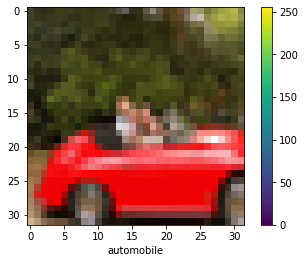

In [11]:
plot_sample(X_train, y_train, 99)

# Preprocess the data: Normalization 

We can see from the plot above that the pixel values of the images are in the range between 0 to 255, before feeding them to the neural network, we need to scale these values to a range between 0 to 1.

This is done by divinding the values by 255. Both the training set and the test set are preprocessed in the same way.


In [12]:
#normalize data
X_train = X_train / 255.0
X_test = X_test / 255.0

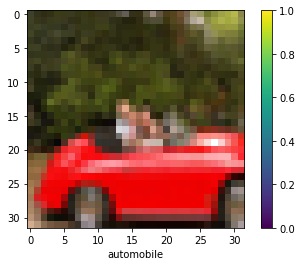

In [13]:
plot_sample(X_train, y_train, 99)

We can now see that the pixel values of the images are between 0 and 1.

# Building the deep learning model 

## ANN model:

We start by building a simple Artificial Neural Network (ANN) Model

In [14]:
#build a simple ann
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

2022-08-30 22:05:26.617575: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Compile the ANN model 

Before training our model, we compile it first by setting:

- Loss function: measures the accuracy of the model during training. the goal is to minimize the loss function. 
- Optimizer: optimizes the loss function and updates the model 
- Metrics: used to monitor the training and test steps 


In [15]:
# compile the model 
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the ANN model 

We first start by calling the fit method which fits the model to the dataset.

In [16]:
#fit the model to the training data
ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.8144 - accuracy: 0.3548
Epoch 2/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.6253 - accuracy: 0.4273
Epoch 3/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.5430 - accuracy: 0.4564
Epoch 4/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.4817 - accuracy: 0.4791
Epoch 5/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.4326 - accuracy: 0.4954
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.3889 - accuracy: 0.5094
Epoch 7/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.3518 - accuracy: 0.5238
Epoch 8/10
1563/1563 [==============================] - 60s 39ms/step - loss: 1.3150 - accuracy: 0.5384
Epoch 9/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.2844 - accuracy: 0.5507
Epoch 10/10
1563/1563 [==============================] - 58s 37m

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.56 (or 56%) on the training data.

Then we evaluate our model to see how it performs on the test set

In [17]:
test_loss, test_acc = ann.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 3s - loss: 1.3806 - accuracy: 0.5082 - 3s/epoch - 9ms/step

Test accuracy: 0.5081999897956848


We can see that it performs even worst on test with an accuracy of of about 0.50 (or 50%).

# Improve the performance using a CNN

the Artificial Neural Network that we trained above is simple to implement but does not perform very well (accuracy of only 56% on the training set and 50% on the test set). 

To improve our results, we use a Convolutional Neural Network (CNN) instead. 

In [18]:
#build cnn 
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

We can display the architecture of our CNN model:

In [19]:
# display the architecture of our CNN
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

# Compile the CNN model:
Before training our model, we compile it first like we did with ANN


In [20]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the CNN model 

We first start by calling the fit method which fits the model to the dataset.

In [21]:
history = cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.4794 - accuracy: 0.4672
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1433 - accuracy: 0.5983
Epoch 3/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0168 - accuracy: 0.6472
Epoch 4/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9362 - accuracy: 0.6756
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8738 - accuracy: 0.6972
Epoch 6/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.8239 - accuracy: 0.7146
Epoch 7/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.7816 - accuracy: 0.7282
Epoch 8/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7450 - accuracy: 0.7415
Epoch 9/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7060 - accuracy: 0.7554
Epoch 10/10
1563/1563 [==============================] - 30s 19m

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.77 (or 77%) on the training data. This is much better than the ANN model which was around 56%.

Then we evaluate our model to see how it performs on the test set

In [22]:
test_loss, test_acc = cnn.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.9141 - accuracy: 0.6981 - 2s/epoch - 6ms/step

Test accuracy: 0.6980999708175659


We can see that it performs even worst on test with an accuracy of of about 0.69 (or 69%). But this is still much better than the performance of the ANN on the test set which was around 50%.

# Make Predictions using the CNN model

We can now use our training model to make predictions on the test set.

We make predictions for the whole X_test set:

In [23]:
#make predictions for the whole X_test set.
predictions = cnn.predict(X_test)

313/313 [==============================] - 2s 6ms/step


We check prediction for the 44th element 

In [24]:
#check prediction for the 44th element 
predictions[44]

array([7.7940226e-01, 8.3015058e-03, 2.9824674e-03, 2.6652538e-06,
       6.9253609e-02, 1.2549778e-04, 2.2957352e-06, 1.6628022e-04,
       1.2963347e-01, 1.0129902e-02], dtype=float32)

We can see that the prediction takes the shape of an an array of 10 numbers. The 10 values represent the model's confidence that the image corresponds to each of the 10 different labels. 

We can see which label has the highest confidence value:

In [25]:
# highest confidence
y_labels = [np.argmax(element) for element in predictions]

In [26]:
#check the class of the 44th element
y_labels[44]

0

In [27]:
#check to what it corresponds 
labels[0]

'airplane'

So, the model is most confident that this image is an airplane, or labels[0]. Examining the test label shows that this classification is correct:

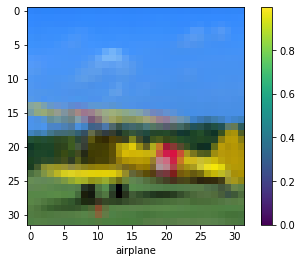

In [28]:
plot_sample(X_test, y_test,44)

Our model prediction for the 44th element of the test set is correct.